<a href="https://colab.research.google.com/github/Manujk-123/Marvel-task-Level-3/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Naive Bayes Algorithm**

The **Naive Bayes algorithm** is a classification technique based on Bayes' Theorem, which is a mathematical formula used to calculate conditional probabilities. It is "naive" because it assumes that the features (predictors) are conditionally independent of each other given the class label, which is often not true in real life, but the algorithm still performs surprisingly well in practice.</br>
###**Naive Bayes Formula:**
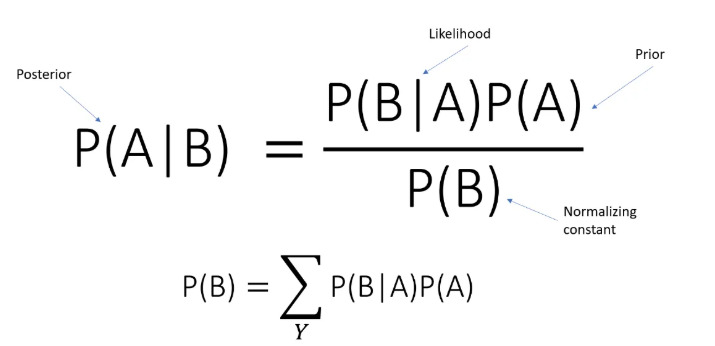</br>
- **P(A|B)** is the posterior probability of class (target) given predictor (attribute).
- **P(B)** is the prior probability of class.
- **P(B|A)** is the likelihood which is the probability of predictor given class.
- **P(A)** is the prior probability of predictor.</br>


Now let us implement the Naive Bayes Algorithm on Wine Dataset..

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



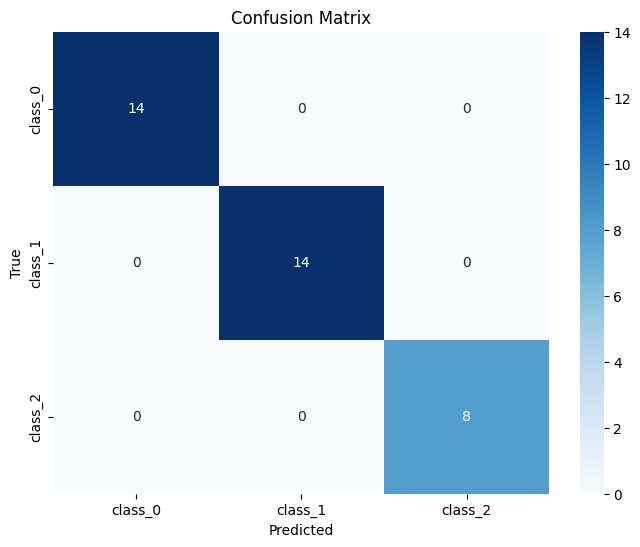

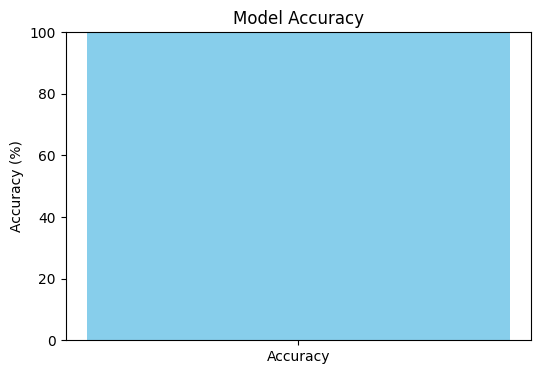

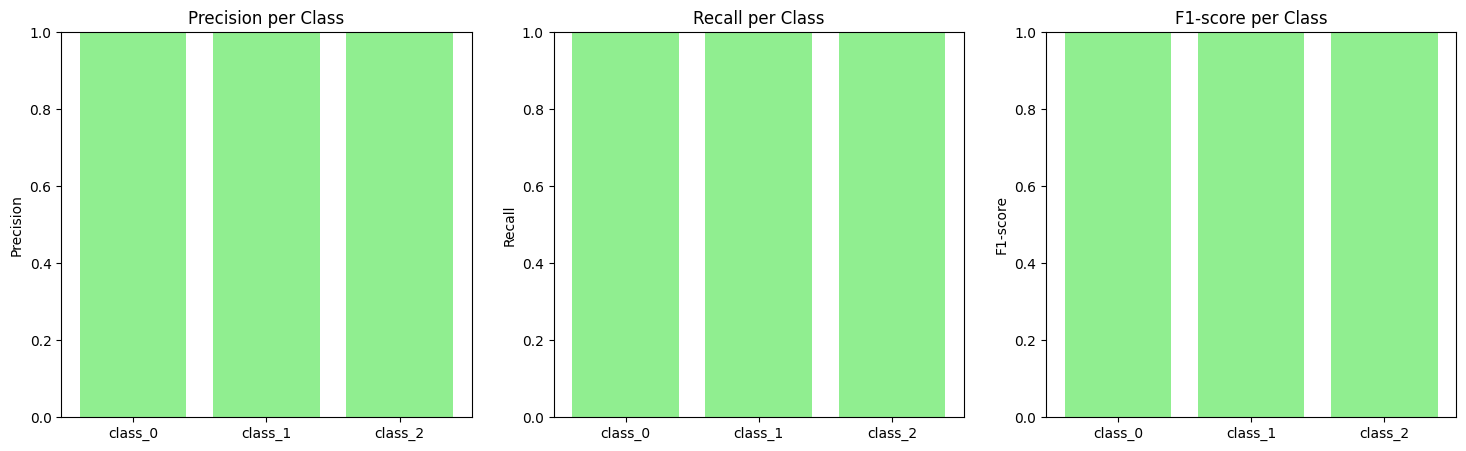

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_wine

# 1. Load the Wine dataset
wine = load_wine()

# Convert the dataset to a DataFrame for better readability (optional)
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target  # Adding the target column (wine class)

# 2. Split the dataset into features (X) and target (y)
X = data.drop(columns=['target'])  # Features (chemical attributes of the wines)
y = data['target']  # Target (wine cultivar)

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the Naive Bayes model (GaussianNB for continuous features)
nb_classifier = GaussianNB()

# 5. Train the model on the training data
nb_classifier.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the accuracy score as a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy * 100], color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

# Plotting precision, recall, and F1-score for each class
metrics = ['precision', 'recall', 'f1-score']
metrics_data = {metric: [class_report[str(i)][metric] for i in range(3)] for metric in metrics}

# Plot each metric
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    ax[i].bar(wine.target_names, metrics_data[metric], color='lightgreen')
    ax[i].set_title(f'{metric.capitalize()} per Class')
    ax[i].set_ylabel(f'{metric.capitalize()}')
    ax[i].set_ylim(0, 1)

plt.show()
